In [196]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt
import glob
from PIL import Image
import numpy as np
import pandas as pd
import time
from sklearn import preprocessing
from keras.layers import Input

In [197]:
# read files from directory https://www.tensorflow.org/tutorials/images/classification
# it uses generators to reduce the memory
desire_size = (100,100)
batch_size = 216
train_ds = tf.keras.utils.image_dataset_from_directory(
  "data/train",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=desire_size,
  batch_size=batch_size,
)

val_ds = tf.keras.utils.image_dataset_from_directory(
  "data/train",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=desire_size,
  batch_size=batch_size,
)

class_names = train_ds.class_names

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 4252 files belonging to 11 classes.
Using 3402 files for training.
Found 4252 files belonging to 11 classes.
Using 850 files for validation.


In [198]:
data_augmentation = Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.4),
  tf.keras.layers.RandomZoom(0.4), 
  # tf.keras.layers.RandomContrast(0.2),
  # tf.keras.layers.RandomWidth(0.2)
  # tf.keras.layers.RandomTranslation(0.2,0.2),
  # tf.keras.layers.RandomBrightness(0.2),
  # tf.keras.layers.experimental.preprocessing.RandomCrop(0.2,0.2)
])

In [199]:
image_input =[100,100]
base_model = tf.keras.applications.VGG19(weights='imagenet', include_top=False, input_shape=image_input+[3])
# Congelar las capas del modelo base
for layer in base_model.layers:
  layer.trainable = False

In [200]:
# network using all the channels
model2 = Sequential([
  layers.Rescaling(1./255, input_shape=(desire_size[0], desire_size[1], 3)),
  data_augmentation,
  # base_model,
  layers.Conv2D(16, 5, padding='same', activation='relu'), 
  # layers.MaxPooling2D(),
  layers.Conv2D(32, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 7, padding='same', activation='relu'),
  # layers.MaxPooling2D(),
  layers.Conv2D(128, 7, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 9, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # layers.Conv2D(512, 9, padding='same', activation='relu'),
  # layers.MaxPooling2D(),
  # layers.Dropout(0.4),
  layers.Flatten(),
  layers.Dense(532, activation='relu'),
  layers.Dense(len(class_names))
])
model2.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [201]:
epochs = 15
history = model2.fit(
  train_ds,
  validation_data = val_ds,
  epochs = epochs
) 

Epoch 1/15
16/16 [==============================] - 125s 7s/step - loss: 2.3710 - accuracy: 0.1202 - val_loss: 2.3424 - val_accuracy: 0.1447
Epoch 2/15
16/16 [==============================] - 101s 6s/step - loss: 2.3125 - accuracy: 0.1573 - val_loss: 2.2540 - val_accuracy: 0.2518
Epoch 3/15
16/16 [==============================] - 100s 6s/step - loss: 2.1442 - accuracy: 0.2428 - val_loss: 1.9470 - val_accuracy: 0.2659
Epoch 4/15
16/16 [==============================] - 106s 7s/step - loss: 1.8875 - accuracy: 0.2840 - val_loss: 2.0631 - val_accuracy: 0.2353
Epoch 5/15
16/16 [==============================] - 104s 6s/step - loss: 1.7353 - accuracy: 0.3489 - val_loss: 1.6114 - val_accuracy: 0.4176
Epoch 6/15
16/16 [==============================] - 114s 7s/step - loss: 1.6206 - accuracy: 0.3912 - val_loss: 1.6174 - val_accuracy: 0.4435
Epoch 7/15
16/16 [==============================] - 105s 7s/step - loss: 1.5404 - accuracy: 0.4462 - val_loss: 1.3609 - val_accuracy: 0.5235
Epoch 8/15
16

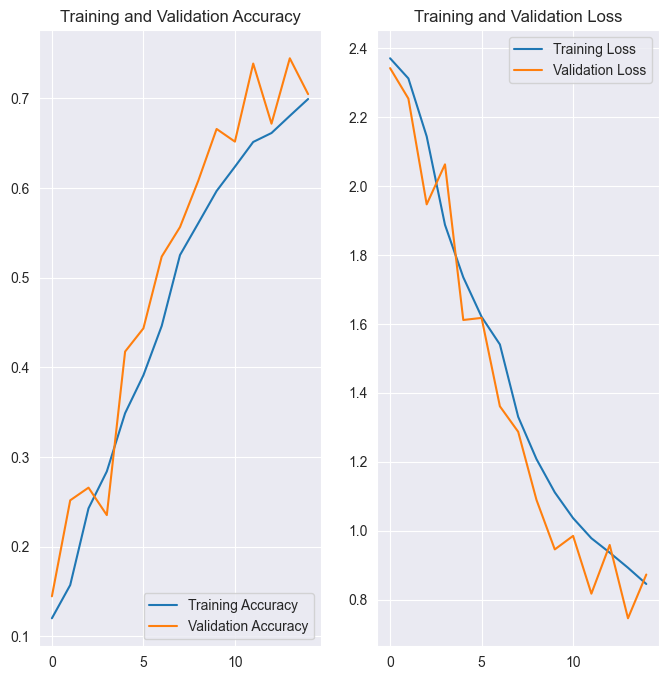

In [202]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [203]:
time.sleep(15)
epochs = 15 
history = model2.fit(
  train_ds,
  validation_data = val_ds,
  epochs = epochs
)

Epoch 1/15
16/16 [==============================] - 89s 6s/step - loss: 0.8192 - accuracy: 0.7099 - val_loss: 0.7460 - val_accuracy: 0.7365
Epoch 2/15
16/16 [==============================] - 94s 6s/step - loss: 0.7619 - accuracy: 0.7334 - val_loss: 0.7317 - val_accuracy: 0.7529
Epoch 3/15
16/16 [==============================] - 95s 6s/step - loss: 0.7345 - accuracy: 0.7322 - val_loss: 0.6524 - val_accuracy: 0.7918
Epoch 4/15
16/16 [==============================] - 94s 6s/step - loss: 0.6980 - accuracy: 0.7534 - val_loss: 0.6701 - val_accuracy: 0.7729
Epoch 5/15
16/16 [==============================] - 94s 6s/step - loss: 0.6957 - accuracy: 0.7551 - val_loss: 0.6482 - val_accuracy: 0.7906
Epoch 6/15
16/16 [==============================] - 94s 6s/step - loss: 0.6489 - accuracy: 0.7719 - val_loss: 0.5851 - val_accuracy: 0.7906
Epoch 7/15
16/16 [==============================] - 92s 6s/step - loss: 0.6108 - accuracy: 0.7816 - val_loss: 0.5430 - val_accuracy: 0.8224
Epoch 8/15
16/16 [==

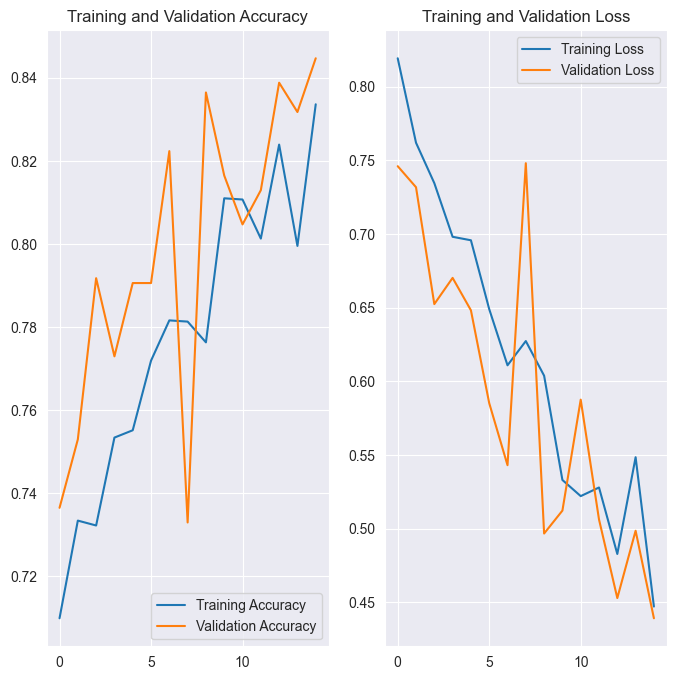

In [204]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [205]:
time.sleep(15)
epochs = 15
history = model2.fit(
  train_ds,
  validation_data = val_ds,
  epochs = epochs
)

Epoch 1/15
16/16 [==============================] - 85s 5s/step - loss: 0.4555 - accuracy: 0.8330 - val_loss: 0.3486 - val_accuracy: 0.8765
Epoch 2/15
16/16 [==============================] - 82s 5s/step - loss: 0.4670 - accuracy: 0.8275 - val_loss: 0.5550 - val_accuracy: 0.8000
Epoch 3/15
16/16 [==============================] - 88s 5s/step - loss: 0.4346 - accuracy: 0.8374 - val_loss: 0.4959 - val_accuracy: 0.8235
Epoch 4/15
16/16 [==============================] - 85s 5s/step - loss: 0.3968 - accuracy: 0.8492 - val_loss: 0.3872 - val_accuracy: 0.8741
Epoch 5/15
16/16 [==============================] - 82s 5s/step - loss: 0.4160 - accuracy: 0.8474 - val_loss: 0.3767 - val_accuracy: 0.8765
Epoch 6/15
16/16 [==============================] - 82s 5s/step - loss: 0.3804 - accuracy: 0.8604 - val_loss: 0.3324 - val_accuracy: 0.8859
Epoch 7/15
16/16 [==============================] - 82s 5s/step - loss: 0.3672 - accuracy: 0.8630 - val_loss: 0.3642 - val_accuracy: 0.8741
Epoch 8/15
16/16 [==

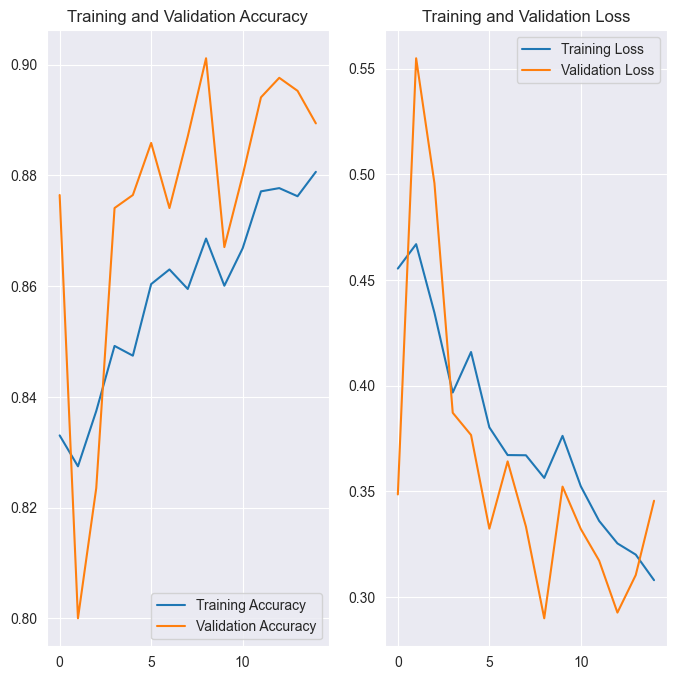

In [206]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [207]:
time.sleep(15)
epochs = 15
history = model2.fit(
  train_ds,
  validation_data = val_ds,
  epochs = epochs
)

Epoch 1/15
16/16 [==============================] - 93s 6s/step - loss: 0.3015 - accuracy: 0.8871 - val_loss: 0.3701 - val_accuracy: 0.8835
Epoch 2/15
16/16 [==============================] - 110s 7s/step - loss: 0.3081 - accuracy: 0.8727 - val_loss: 0.3966 - val_accuracy: 0.8494
Epoch 3/15
16/16 [==============================] - 106s 7s/step - loss: 0.2864 - accuracy: 0.8880 - val_loss: 0.3831 - val_accuracy: 0.8800
Epoch 4/15
16/16 [==============================] - 104s 7s/step - loss: 0.2949 - accuracy: 0.8892 - val_loss: 0.3135 - val_accuracy: 0.8976
Epoch 5/15
16/16 [==============================] - 106s 7s/step - loss: 0.2767 - accuracy: 0.8954 - val_loss: 0.3688 - val_accuracy: 0.8871
Epoch 6/15
16/16 [==============================] - 106s 7s/step - loss: 0.2689 - accuracy: 0.8880 - val_loss: 0.3793 - val_accuracy: 0.8776
Epoch 7/15
16/16 [==============================] - 107s 7s/step - loss: 0.3401 - accuracy: 0.8774 - val_loss: 0.3965 - val_accuracy: 0.8706
Epoch 8/15
16/

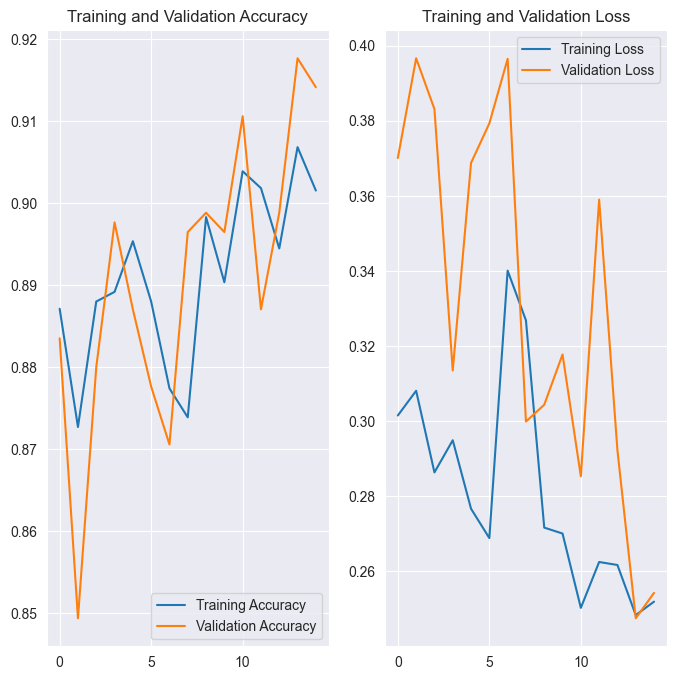

In [208]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [209]:
# time.sleep(15)
# epochs = 15
# history = model2.fit(
#   train_ds,
#   validation_data = val_ds,
#   epochs = epochs
# )

In [210]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# 
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# 
# epochs_range = range(epochs)
# 
# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')
# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()

In [211]:
# time.sleep(15)
# epochs = 15
# history = model2.fit(
#   train_ds,
#   validation_data = val_ds,
#   epochs = epochs
# )

In [212]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# 
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# 
# epochs_range = range(epochs)
# 
# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')
# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()

In [213]:
# time.sleep(15)
# epochs = 10
# history = model2.fit(
#   train_ds,
#   validation_data = val_ds,
#   epochs = epochs
# )

In [214]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# 
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# 
# epochs_range = range(epochs)
# 
# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')
# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()

In [215]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# 
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# 
# epochs_range = range(epochs)
# 
# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')
# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()

In [216]:
array_image = []
array_name = []
for file in glob.glob("data/test/*"):
  img = tf.keras.utils.load_img(
    file, 
    target_size=desire_size
  )
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)
  predict = model2.predict(img_array)
  score = tf.nn.softmax(predict[0])
  array_image.append(class_names[np.argmax(score)])
  array_name.append(file.split("\\")[1])

1/1 [==============================] - 0s 35ms/step


In [217]:
df_oob = pd.DataFrame(data= zip(array_name, array_image),
                      columns=["file","species"])
df_oob.to_csv("data/prediction_cnn.csv", index=False)

In [218]:
df_oob.replace("Shepherds Purse","Shepherd’s Purse",inplace=True) 
df_oob.to_csv("data/prediction_cnn.csv", index=False)

In [219]:
model2.save('model_6') 

INFO:tensorflow:Assets written to: model_6\assets


INFO:tensorflow:Assets written to: model_6\assets
